<a href="https://colab.research.google.com/github/aksshiny/survival-analysis-on-churn/blob/main/Copy_of_Survival_analysis_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=63bcd396ec315b8576c1264f488943a70604acb95388bddeab8fe95081157794
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
customer_df = pd.read_csv("/content/churn.csv")

In [ ]:
customer_df['Churn']=customer_df['Churn'].apply(lambda x: 1 if x == "Yes" else 0 )

In [ ]:
from lifelines import KaplanMeierFitter

In [ ]:
durations = customer_df["tenure"]

In [ ]:
event_observed = customer_df['Churn']

In [ ]:
kmf = KaplanMeierFitter()

In [ ]:
kmf.fit(durations, event_observed, label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 7043 total observations, 5174 right-censored observations>

<Axes: xlabel='timeline'>

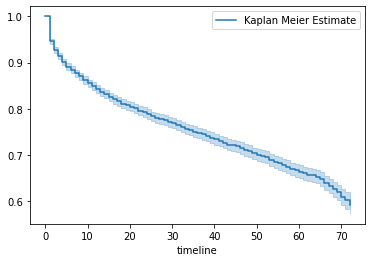

In [ ]:
kmf.plot()

NameError: ignored

In [ ]:
kmf1 = KaplanMeierFitter()
T = customer_df["tenure"]
E = customer_df["Churn"]

In [ ]:
groups = customer_df['StreamingTV']
i1 = (groups =='No')
i2 = (groups =='Yes')

<Axes: xlabel='timeline'>

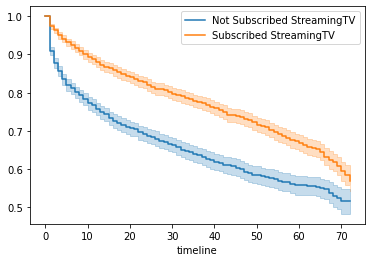

In [ ]:
kmf1.fit(T[i1], E[i1], label="Not Subscribed StreamingTV")
a1 = kmf1.plot()

kmf1.fit(T[i2], E[i2], label="Subscribed StreamingTV")
kmf1.plot(ax=a1)

In [ ]:
kmf2 = KaplanMeierFitter()
T = customer_df["tenure"]
E = customer_df["Churn"]

In [ ]:
groups = customer_df['Contract']
i4 = (groups =='Month-to-month')
i5 = (groups =='One year')
i6 = (groups =='Two year')


<Axes: xlabel='timeline'>

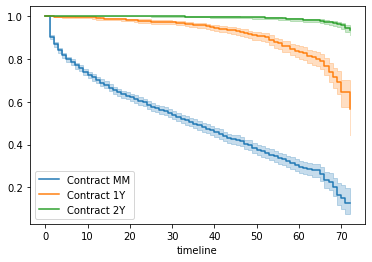

In [ ]:
kmf2.fit(T[i4], E[i4], label="Contract MM")
a2 = kmf2.plot()
kmf2.fit(T[i5], E[i5], label="Contract 1Y")
a3 = kmf2.plot()
kmf2.fit(T[i6], E[i6], label="Contract 2Y")
kmf2.plot(ax=a3)